## **Assignment 1: Web Scraping and Data Visualization**

### **(I) Problem Summary**

Using data science techniques, I would like to extract and explore the gender pay gap across countries.With a surge in women empowerment activism, difference in professional remuneration based on gender is one of the major issues that needs to be addressed. The need to address this factor arises due to the increasing number of women workforce that may impact every country's GDP.

### **(II) Importing Python Libraries**

In [2]:
import requests
from bs4 import BeautifulSoup
import lxml
import lxml.html as lh
import numpy as np
import pandas as pd

### **(III) Data Extraction using Web Scraping Technique-BeautifulSoup Python Library**

BeautifulSoup is one of the most powerful Python Library for web scraping online content. It makes it easy the scrape content from web pages and sits atop a HTML parser. I will be scraping the Wikipedia content on the inventors and their causes of death.

In [3]:
url="https://en.wikipedia.org/wiki/Global_Gender_Gap_Report"
txt=requests.get(url)
html=txt.text
soup=BeautifulSoup(html,'lxml')
print(soup.title)

<title>Global Gender Gap Report - Wikipedia</title>


In [4]:
content=soup.find_all('table', class_='wikitable sortable')[0]
print(len(content))

2


In [5]:
#Extracting HTML data and transforming into a dataframe
rows=content.findAll('tr')
data=[]

for row in rows:
    head=row.findAll('th')
    head=[x.text.strip() for x in head]
    cols=row.findAll('td')
    cols=[x.text.strip() for x in cols]
    data.append(cols)
print(len(data))

df=pd.DataFrame(data)
df.rename(columns={0:'Country',1:'Region',2:'2006',3:'2007',4:'2008',5:'2009',6:'2010',7:'2011',8:'2012',9:'2013',10:'2014',11:'2015',12:'2016',13:'2017'}, inplace=True)
df=df.drop([df.index[0],df.index[1]])
df.replace({'N/A':np.NaN},inplace=True)
df.head(5)

149


,Country,Region,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,Albania,Europe,0.6607,0.6685,0.6591,0.6601,0.6726,0.6748,0.6655,0.6412,0.6869,0.701,0.704,0.728
3,Algeria,Africa,0.6018,0.6068,0.6111,0.6119,0.6052,0.5991,0.6112,0.5966,0.6182,0.632,0.642,0.629
4,Angola,Africa,0.6039,0.6034,0.6032,0.6353,0.6712,0.6624,NaN,0.6659,0.6311,0.637,0.643,0.640
5,Argentina,South America,0.6829,0.6982,0.7209,0.7211,0.7187,0.7236,0.7212,0.7195,0.7317,0.734,0.735,0.732
6,Armenia,Europe and Central Asia,NaN,0.6651,0.6677,0.6619,0.6669,0.6654,0.6636,0.6634,0.6622,0.668,0.669,0.677


***Note:The Global Pay Gap Index-Highest possible score is 1 (equality or better for women, except for lifespan (106% or better for women) and gender parity at birth (94.4% or better for women) and the lowest possible score is 0***

### **(IV) Exploring Data: Data Cleaning**

So, now that I have scraped the data of my interest from the wikipedia page, I will now start looking first at the tabular data to just gain insigths on the WEF Global Gender Gap Index rankings for each country.

In [6]:
convert={'2006':float,'2007':float,'2008':float,'2009':float,'2010':float,'2011':float,'2012':float,'2013':float,'2014':float,'2015':float,'2016':float,'2017':float}
df = df.astype(convert)
df.dtypes
df.describe()
df.head(5)

,Country,Region,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
2,Albania,Europe,0.6607,0.6685,0.6591,0.6601,0.6726,0.6748,0.6655,0.6412,0.6869,0.701,0.704,0.728
3,Algeria,Africa,0.6018,0.6068,0.6111,0.6119,0.6052,0.5991,0.6112,0.5966,0.6182,0.632,0.642,0.629
4,Angola,Africa,0.6039,0.6034,0.6032,0.6353,0.6712,0.6624,NaN,0.6659,0.6311,0.637,0.643,0.640
5,Argentina,South America,0.6829,0.6982,0.7209,0.7211,0.7187,0.7236,0.7212,0.7195,0.7317,0.734,0.735,0.732
6,Armenia,Europe and Central Asia,NaN,0.6651,0.6677,0.6619,0.6669,0.6654,0.6636,0.6634,0.6622,0.668,0.669,0.677


Using only the describe function, I am not able to gain much insights into my data other than acquiring the frequency of the records.

Hence, I used another library to gain more insights from my data as well as display the outputs in a more attractive way. In order to do that, I installed pandas profiling. Pandas Profiling is a Python library that displays your output as a HTML file.  

In [7]:
!conda install -c conda-forge pandas-profiling --yes
import pandas_profiling as pdp

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - pandas-profiling


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.6.7                |           py36_0         869 KB  conda-forge
    pandas-profiling-1.4.1     |             py_1          26 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         895 KB

The following NEW packages will be INSTALLED:

  pandas-profiling   conda-forge/noarch::pandas-profiling-1.4.1-py_1

The following packages will be UPDATED:

  conda                                        4.6.4-py36_0 --> 4.6.7-py36_0



pandas-profiling-1.4 | 26 KB     | ##################################### | 100% 
conda-4.6.7          | 869 KB    | ##################################### | 100% 
Preparing transaction: d

In [8]:
#Diagnosing the data
diagnosis = pdp.ProfileReport(df)
diagnosis.to_file(outputfile="diagnosis.html")

/home/jupyterlab/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jupyterlab/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jupyterlab/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jupyterlab/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
/home/jupyterlab/conda/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning:

In [9]:
#Displaying the output using HTML function
from IPython.display import HTML
HTML(filename='diagnosis.html')

Number of variables,15
Number of observations,147
Total Missing (%),1.5%
Total size in memory,17.3 KiB
Average record size in memory,120.5 B
Numeric,2
Categorical,1
Boolean,0
Date,0
Text (Unique),1
Rejected,11


Wow! This is an awesome way to see our data and understand its distribution. This becomes more self-explanatory and is a quick way to analyse the data distribution in just two-three lines of code. Looking at the diagnosis overview, I gather that I have few missing values in my dataset which are attributed to the unavailability of the information. Moreover, the Gender Pay Gap Index seems to be highly correlated when viewed across the years. The mean index value for all the years lie approximately around 0.6 with a standard deviation of +/-0.05. 

### **(V) Data Transformation**

In order to be able to analyze the data, I transformed my dataframe by using the melt function in pandas. I have now arranged my data with the years column transformed into one single column. 

In [10]:
#Tidying the data for analysis
transdf = pd.melt(df,["Country","Region"],var_name="Year",value_name="Index")
transdf = transdf.sort_values(by=["Country","Region"])
transdf.head(5)

,Country,Region,Year,Index
0,Albania,Europe,2006,0.6607
147,Albania,Europe,2007,0.6685
294,Albania,Europe,2008,0.6591
441,Albania,Europe,2009,0.6601
588,Albania,Europe,2010,0.6726


In [11]:
#Now describing the data to understand its distribution better
transdf.describe()

,Index
count,1605.000000
mean,0.682857
std,0.059962
min,0.451000
25%,0.648000
50%,0.686000
75%,0.718700
max,0.881000


Furthermore, I have grouped the gender pay gap index region and yearwise by considering the median values for each country within that region.

In [12]:
#Grouping the data by region
regrp=transdf.groupby(['Region','Year']).median()
regrp.reset_index(inplace=True)
regrp.head()

,Region,Year,Index
0,Africa,2006,0.63440
1,Africa,2007,0.64210
2,Africa,2008,0.64660
3,Africa,2009,0.64695
4,Africa,2010,0.64990


In [13]:
#Grouping the data by country
co=transdf.groupby(['Country','Year']).median()
co.reset_index(inplace=True)
co.head()

,Country,Year,Index
0,Albania,2006,0.6607
1,Albania,2007,0.6685
2,Albania,2008,0.6591
3,Albania,2009,0.6601
4,Albania,2010,0.6726


### **(VI) Data Visualization**

Now, in order to analyze the continous data along with my categorical variable "Region", I will be using the Seaborn Library to gain more insights into the data. The Seaborn Library is an alternative to matplotlib with a high level interface wherein it makes visualization attractive and easy to create from dataframes.

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

#### ***(a) Exploring the trends in Gender Pay Gap Index specific to Regions from 2006-2017***

/home/jupyterlab/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


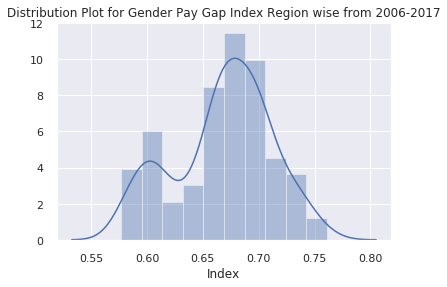

In [15]:
#Distribution plot of Gender Pay Gap Index-Region Specific
di=sns.distplot(regrp.Index.dropna())
plt.title("Distribution Plot for Gender Pay Gap Index Region wise from 2006-2017")
plt.show()
dist= di.get_figure()
dist.savefig('distribution.png')

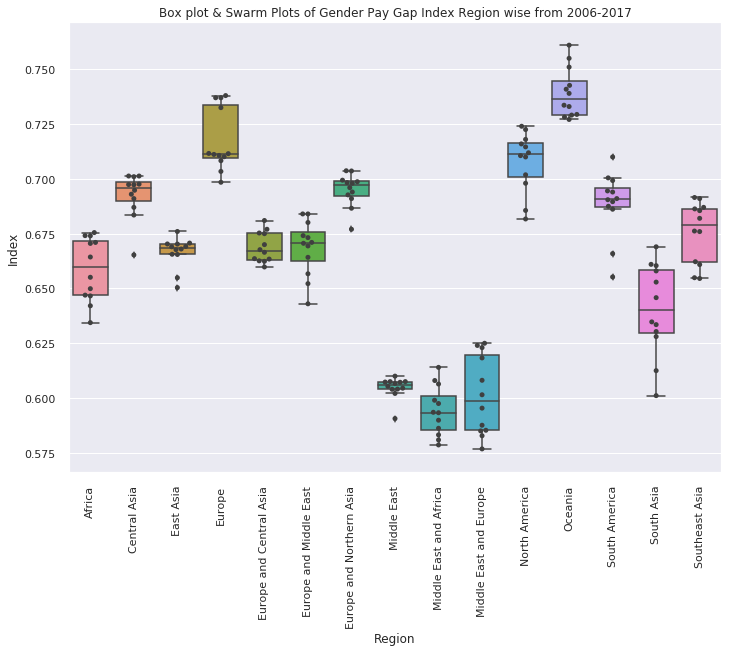

In [16]:
#Box plot & Swarm plot of Gender Pay Gap Index-Region Specific
ax=sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xticks(rotation=90)
ax=sns.boxplot(data = regrp, x = "Region", y = "Index")
ax=sns.swarmplot(x="Region", y="Index", data=regrp, color=".25")
plt.title("Box plot & Swarm Plots of Gender Pay Gap Index Region wise from 2006-2017")
fig= ax.get_figure()
fig.savefig('boxplot.png')

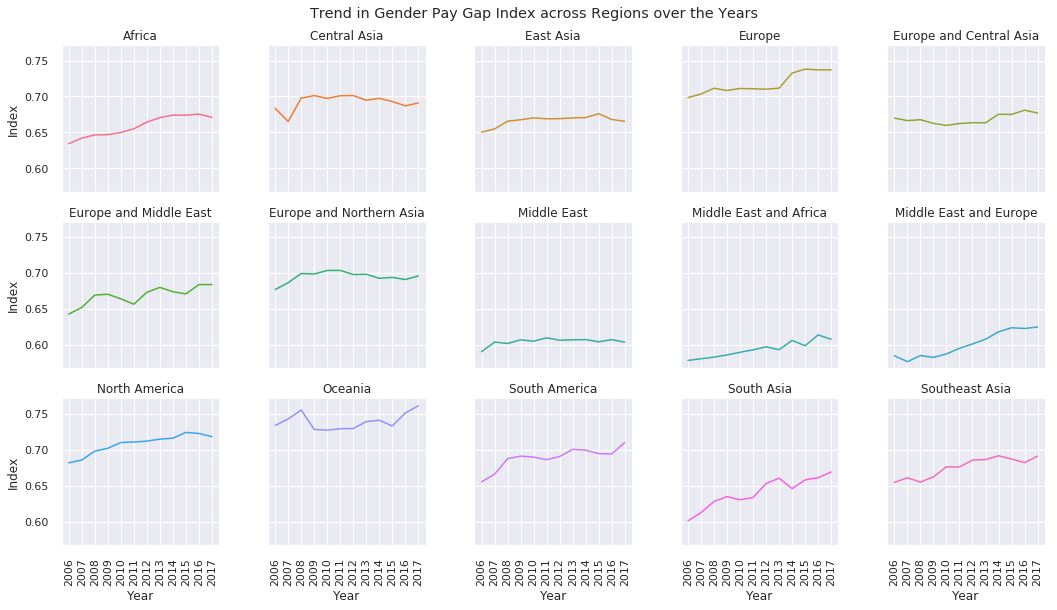

In [17]:
#Multiple Line plots of Gender Pay Gap Index-Region Specific
g = sns.FacetGrid(regrp, col='Region', hue='Region', col_wrap=5, )
g = g.map(plt.plot, 'Year', 'Index')
for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(90)
#g = g.map(plt.fill_between, 'Year', 'Index', alpha=0.3).set_titles("{col_name} Region")
g = g.set_titles("{col_name}")
plt.subplots_adjust(top=0.92, bottom=0.15)
g = g.fig.suptitle('Trend in Gender Pay Gap Index across Regions over the Years')
plt.show()
fig= g.get_figure()
fig.savefig('trendline.png')

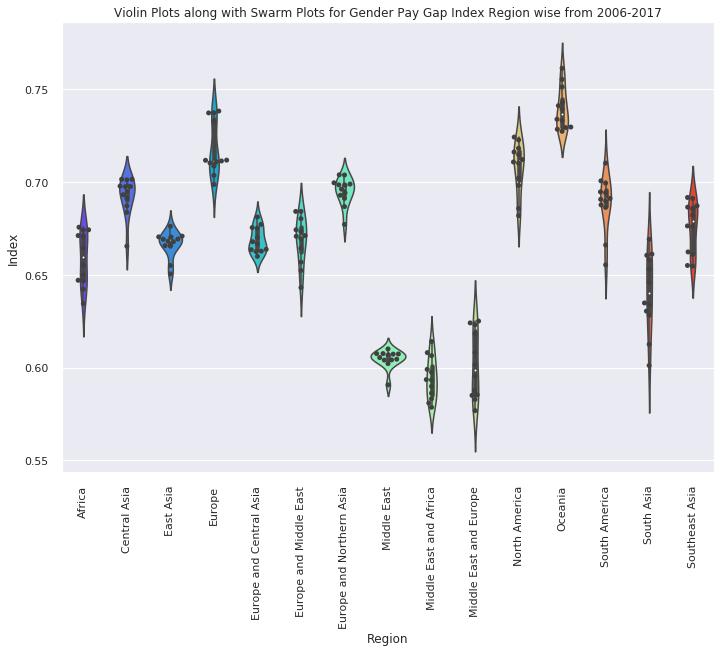

In [18]:
vi = sns.violinplot( x = "Region", y = "Index", data = regrp, palette='rainbow')
vi = sns.swarmplot(x="Region", y="Index", data=regrp, color=".25")
plt.xticks(rotation=90)
plt.title("Violin Plots along with Swarm Plots for Gender Pay Gap Index Region wise from 2006-2017")
fig= vi.get_figure()
fig.savefig('violinplot.png')

#### ***(b) Exploring the trends in Gender Pay Gap Index specific to Countries from 2006-2017***

In order to view the Gender Pay Gap Index from 2006-17 for all countries, I felt that the map would be ideal method to visualize the trends in the Index. Hence, I have used Folium Library to create a choropleth map showing the Gender Pay Gap index across countries from 2006-2017. **However, I am unable to create a code for embedding a time slider to view my data across the timeline.**

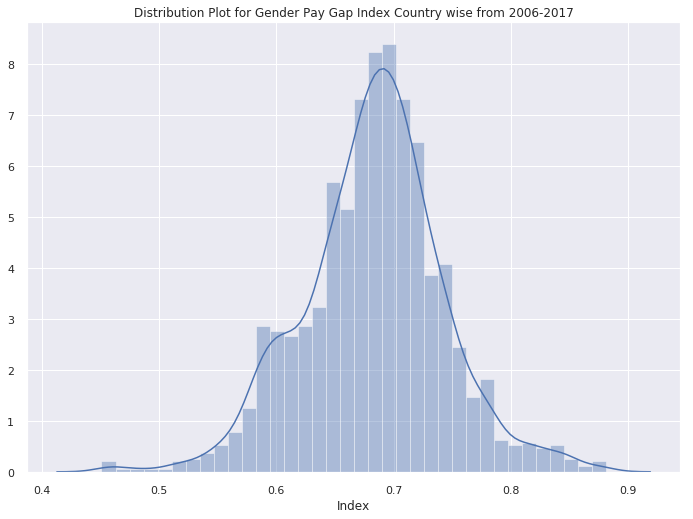

In [19]:
#Distribution plot of Gender Pay Gap Index-Country Specific
dico=sns.distplot(co.Index.dropna())
plt.title("Distribution Plot for Gender Pay Gap Index Country wise from 2006-2017")
plt.show()
disto= dico.get_figure()
disto.savefig('Co_distribution.png')

In [20]:
import folium
from folium import plugins
from folium.plugins import MarkerCluster
import matplotlib
import matplotlib.pyplot as plt
!conda install -c conda-forge plotly --yes
import plotly
plotly.__version__
import plotly.plotly as py

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs:
    - plotly


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    plotly-3.6.1               |             py_0        26.7 MB  conda-forge
    retrying-1.3.3             |             py_2          11 KB  conda-forge
    ------------------------------------------------------------
                                           Total:        26.8 MB

The following NEW packages will be INSTALLED:

  plotly             conda-forge/noarch::plotly-3.6.1-py_0
  retrying           conda-forge/noarch::retrying-1.3.3-py_2



retrying-1.3.3       | 11 KB     | ##################################### | 100% 
plotly-3.6.1         | 26.7 MB   | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [27]:
!wget --quiet https://ibm.box.com/shared/static/cto2qv7nx6yq19logfcissyy4euo8lho.json -O world_countries.json
    
print('GeoJSON file downloaded!')
world_geo = r'world_countries.json'
worldmap = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
worldmap.choropleth(
    geo_data=world_geo,
    data=df,
    columns=['Country', '2017'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Gender Pay Gap in 2017'
)
worldmap

GeoJSON file downloaded!
